**Data Description:**

The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

## **Importing Necessary Libraries**

In [1]:
from  google.colab import drive
import os
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from keras.models import Sequential,Model
from keras import optimizers, regularizers
from keras.optimizers import SGD,RMSprop,Adam,Nadam
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dense,Dropout,LSTM
from keras.layers import Activation,Flatten,Input,BatchNormalization
from keras.layers import Conv1D,MaxPooling1D,Conv2D,MaxPooling2D
from keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D

import h5py

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.2.0'

## **Loading the Dataset**

In [3]:
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
os.chdir('/content/gdrive/My Drive/AIML/Great Learning/Neural Networks/')

In [5]:
filename = 'SVHN_single_grey1.h5'
h5f = h5py.File(filename,'r')

In [6]:
np.random.seed(20)

## **Understanding the train/val/test splits**

In [7]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]

In [8]:
h5f.close

<bound method File.close of <HDF5 file "SVHN_single_grey1.h5" (mode r)>>

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)
(60000, 32, 32)
(60000,)


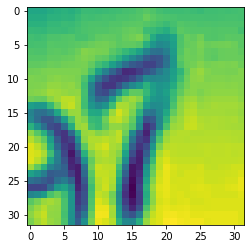

Label:  7


In [10]:
plt.imshow(X_train[2000])    # show first number in the dataset
plt.show()
print('Label: ', y_train[2000])

## **Data Processing**

In [11]:
# reshaping X data: (n, 32, 32) => (n, 1024)
X_train = X_train.reshape((X_train.shape[0], -1))
X_val = X_val.reshape((X_val.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [12]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(42000, 1024) (60000, 1024) (18000, 1024) (42000, 10) (60000, 10) (18000, 10)


## **Implement and apply a deep neural network classifier**

In [93]:
def model_1_train_val(Lambda, hidden_nodes, bsize, steps, opt, verb=True):

    ## hyperparameters
    output_nodes = 10

    model_1 = Sequential()

    model_1.add(Dense(hidden_nodes, input_shape = (1024, ), activation='relu'))
    model_1.add(BatchNormalization())  
    model_1.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
    model_1.add(BatchNormalization())  
    model_1.add(Dropout(0.25))
    model_1.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
    model_1.add(BatchNormalization()) 
    model_1.add(Dropout(0.25))
    model_1.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
    model_1.add(Dropout(0.2))
    model_1.add(Dense(output_nodes, kernel_initializer='he_normal', activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))  

    # Compile model
    model_1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # Fit the model
    model_1.fit(X_train, y_train,validation_data=(X_val,y_val), batch_size = bsize, epochs = steps, verbose = 1)
    model_scores=model_1.evaluate(X_val,y_val,verbose=0)

    return model_scores

In [95]:
lr = 0.01
Lambda = 0
hidden_nodes = 100
batch_size = 200
epochs = 20

sgd = optimizers.SGD(lr = lr, decay=1e-5, momentum=0.9)
sgd1 = optimizers.SGD(lr = lr)
sgd_scrore = model_1_train_val(Lambda, hidden_nodes, batch_size, epochs, sgd)
sgd_scrore

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 74us/step - loss: 2.1400 - accuracy: 0.2628 - val_loss: 1.5971 - val_accuracy: 0.4444
Epoch 2/20
42000/42000 [==============================] - 3s 60us/step - loss: 1.4903 - accuracy: 0.4938 - val_loss: 1.3205 - val_accuracy: 0.5647
Epoch 3/20
42000/42000 [==============================] - 3s 63us/step - loss: 1.3127 - accuracy: 0.5697 - val_loss: 1.4516 - val_accuracy: 0.5114
Epoch 4/20
42000/42000 [==============================] - 3s 66us/step - loss: 1.2120 - accuracy: 0.6116 - val_loss: 1.2175 - val_accuracy: 0.5999
Epoch 5/20
42000/42000 [==============================] - 3s 69us/step - loss: 1.1332 - accuracy: 0.6404 - val_loss: 1.1472 - val_accuracy: 0.6375
Epoch 6/20
42000/42000 [==============================] - 3s 66us/step - loss: 1.0923 - accuracy: 0.6562 - val_loss: 1.1652 - val_accuracy: 0.6207
Epoch 7/20
42000/42000 [==============================] - 3s 63us/st

[0.7380557815035185, 0.7629333138465881]

In [97]:
lr = 0.001
Lambda = 0
hidden_nodes = 250
batch_size = 500
epochs = 20

adam = optimizers.Adam(lr = lr)

adam_scrore = model_1_train_val(Lambda, hidden_nodes, batch_size, epochs, adam)
adam_scrore

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 5s 116us/step - loss: 2.1932 - accuracy: 0.2877 - val_loss: 1.8874 - val_accuracy: 0.3646
Epoch 2/20
42000/42000 [==============================] - 4s 102us/step - loss: 1.2670 - accuracy: 0.5930 - val_loss: 1.6119 - val_accuracy: 0.4631
Epoch 3/20
42000/42000 [==============================] - 4s 101us/step - loss: 1.0611 - accuracy: 0.6662 - val_loss: 1.2304 - val_accuracy: 0.5986
Epoch 4/20
42000/42000 [==============================] - 4s 102us/step - loss: 0.9404 - accuracy: 0.7040 - val_loss: 1.0313 - val_accuracy: 0.6687
Epoch 5/20
42000/42000 [==============================] - 4s 101us/step - loss: 0.8793 - accuracy: 0.7247 - val_loss: 1.1685 - val_accuracy: 0.6053
Epoch 6/20
42000/42000 [==============================] - 4s 100us/step - loss: 0.8141 - accuracy: 0.7459 - val_loss: 1.0709 - val_accuracy: 0.6468
Epoch 7/20
42000/42000 [==============================] - 4s 1

[0.589559827530384, 0.812583327293396]

In [100]:
lr = 0.01
Lambda = 0
hidden_nodes = 512
batch_size = 200
epochs = 50

adam = optimizers.Adam(lr = lr)

adam_scrore = model_1_train_val(Lambda, hidden_nodes, batch_size, epochs, adam)
adam_scrore

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 13s 303us/step - loss: 2.2706 - accuracy: 0.2797 - val_loss: 2.0585 - val_accuracy: 0.3390
Epoch 2/50
42000/42000 [==============================] - 12s 285us/step - loss: 1.3320 - accuracy: 0.5583 - val_loss: 1.8338 - val_accuracy: 0.3879
Epoch 3/50
42000/42000 [==============================] - 12s 288us/step - loss: 1.1054 - accuracy: 0.6510 - val_loss: 1.4583 - val_accuracy: 0.5696
Epoch 4/50
42000/42000 [==============================] - 12s 289us/step - loss: 1.0310 - accuracy: 0.6786 - val_loss: 1.5167 - val_accuracy: 0.5170
Epoch 5/50
42000/42000 [==============================] - 12s 286us/step - loss: 0.9534 - accuracy: 0.7030 - val_loss: 1.2952 - val_accuracy: 0.5977
Epoch 6/50
42000/42000 [==============================] - 12s 287us/step - loss: 0.8978 - accuracy: 0.7210 - val_loss: 1.3101 - val_accuracy: 0.5790
Epoch 7/50
42000/42000 [==============================] 

[0.5084821804533403, 0.8433166742324829]

### **Writing a generalized function which can be called over a loop for various combination of Learning rate and Lambda value**

In [113]:
def model_2_train_val(iterations, Lambda, hidden_nodes, bsize, steps, opt, verb=True):

    ## hyperparameters
    output_nodes = 10
    iterations = iterations

    model_1 = Sequential()

    model_1.add(Dense(hidden_nodes, input_shape = (1024, ), activation='relu'))
    model_1.add(BatchNormalization())  
    model_1.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
    model_1.add(BatchNormalization())  
    model_1.add(Dropout(0.25))
    model_1.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
    model_1.add(BatchNormalization()) 
    model_1.add(Dropout(0.25))
    model_1.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
    model_1.add(Dropout(0.2))
    model_1.add(Dense(output_nodes, kernel_initializer='he_normal', activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))  

    # Compile model
    model_1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    # Fit the model
    model_1.fit(X_train, y_train,validation_data=(X_val,y_val), batch_size = bsize, epochs = steps, verbose = 1)
    model_scores=model_1.evaluate(X_val,y_val,verbose=0)

    return model_scores

In [126]:
#random configuration values
hidden_nodes = 200
batch_size = 1000
epochs = 20

In [127]:
# Calling the function over a loop to indentify the best hypertuning parameters for ADAM optimizer
import math
for k in range(1,6):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    adam = optimizers.Adam(lr = lr)
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = model_2_train_val(5, Lambda, hidden_nodes, batch_size, epochs, adam, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 5, best_acc, lr, Lambda))

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 4s 86us/step - loss: 2.5800 - accuracy: 0.1870 - val_loss: 2.7340 - val_accuracy: 0.1887
Epoch 2/20
42000/42000 [==============================] - 3s 69us/step - loss: 1.6824 - accuracy: 0.4345 - val_loss: 1.7879 - val_accuracy: 0.4190
Epoch 3/20
42000/42000 [==============================] - 3s 70us/step - loss: 1.3038 - accuracy: 0.5799 - val_loss: 1.6199 - val_accuracy: 0.4635
Epoch 4/20
42000/42000 [==============================] - 3s 69us/step - loss: 1.1583 - accuracy: 0.6365 - val_loss: 1.2756 - val_accuracy: 0.5893
Epoch 5/20
42000/42000 [==============================] - 3s 68us/step - loss: 1.0516 - accuracy: 0.6745 - val_loss: 1.1005 - val_accuracy: 0.6532
Epoch 6/20
42000/42000 [==============================] - 3s 69us/step - loss: 0.9875 - accuracy: 0.6939 - val_loss: 1.0304 - val_accuracy: 0.6733
Epoch 7/20
42000/42000 [==============================] - 3s 70us/st

In [128]:
# Calling the function over a loop to indentify the best hypertuning parameters for SGD optimizer

hidden_nodes = 200
batch_size = 1000
epochs = 20

for k in range(1,6):
    lr = math.pow(10, np.random.uniform(-4.0, -1.0))
    sgd = optimizers.SGD(lr = lr, decay=1e-5, momentum=0.9)
    Lambda = math.pow(10, np.random.uniform(-4,-2))
    best_acc = model_2_train_val(5, Lambda, hidden_nodes, batch_size, epochs, sgd, False)
    print("Try {0}/{1}: Best_val_acc: {2}, lr: {3}, Lambda: {4}\n".format(k, 5, best_acc, lr, Lambda))

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 78us/step - loss: 3.2519 - accuracy: 0.0989 - val_loss: 3.5817 - val_accuracy: 0.1110
Epoch 2/20
42000/42000 [==============================] - 3s 67us/step - loss: 3.1182 - accuracy: 0.1063 - val_loss: 2.7138 - val_accuracy: 0.1216
Epoch 3/20
42000/42000 [==============================] - 3s 71us/step - loss: 3.0025 - accuracy: 0.1120 - val_loss: 2.6267 - val_accuracy: 0.1247
Epoch 4/20
42000/42000 [==============================] - 3s 71us/step - loss: 2.9351 - accuracy: 0.1192 - val_loss: 2.6230 - val_accuracy: 0.1218
Epoch 5/20
42000/42000 [==============================] - 3s 70us/step - loss: 2.8943 - accuracy: 0.1255 - val_loss: 2.4559 - val_accuracy: 0.1444
Epoch 6/20
42000/42000 [==============================] - 3s 69us/step - loss: 2.8531 - accuracy: 0.1286 - val_loss: 2.4047 - val_accuracy: 0.1577
Epoch 7/20
42000/42000 [==============================] - 3s 67us/st

In [130]:
lr = 0.0033214989603793047
Lambda = 0.00010655851380494444
hidden_nodes = 200
batch_size = 1000
epochs = 50

sgd = optimizers.SGD(lr = lr, decay=1e-5, momentum=0.9)

sgd_scrore_tuned = model_2_train_val(1, Lambda, hidden_nodes, batch_size, epochs, sgd)
sgd_scrore_tuned

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 79us/step - loss: 2.9584 - accuracy: 0.1226 - val_loss: 4.3623 - val_accuracy: 0.1084
Epoch 2/50
42000/42000 [==============================] - 3s 67us/step - loss: 2.4545 - accuracy: 0.1870 - val_loss: 2.3000 - val_accuracy: 0.2115
Epoch 3/50
42000/42000 [==============================] - 3s 69us/step - loss: 2.1002 - accuracy: 0.2843 - val_loss: 1.7851 - val_accuracy: 0.4068
Epoch 4/50
42000/42000 [==============================] - 3s 67us/step - loss: 1.8506 - accuracy: 0.3627 - val_loss: 1.5683 - val_accuracy: 0.4949
Epoch 5/50
42000/42000 [==============================] - 3s 68us/step - loss: 1.6601 - accuracy: 0.4335 - val_loss: 1.3855 - val_accuracy: 0.5621
Epoch 6/50
42000/42000 [==============================] - 3s 67us/step - loss: 1.5263 - accuracy: 0.4855 - val_loss: 1.3541 - val_accuracy: 0.5726
Epoch 7/50
42000/42000 [==============================] - 3s 68us/st

[0.700470710404714, 0.7813666462898254]

In [131]:
lr = 0.0007668630001688477
Lambda = 0.0009907294593495255
hidden_nodes = 200
batch_size = 1000
epochs = 50

adam = optimizers.Adam(lr = lr)

adm_scrore_tuned = model_2_train_val(1, Lambda, hidden_nodes, batch_size, epochs, adam)
adm_scrore_tuned

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 4s 87us/step - loss: 2.5559 - accuracy: 0.1925 - val_loss: 2.4897 - val_accuracy: 0.2354
Epoch 2/50
42000/42000 [==============================] - 3s 70us/step - loss: 1.6573 - accuracy: 0.4460 - val_loss: 1.6955 - val_accuracy: 0.4418
Epoch 3/50
42000/42000 [==============================] - 3s 69us/step - loss: 1.2965 - accuracy: 0.5862 - val_loss: 1.3361 - val_accuracy: 0.5745
Epoch 4/50
42000/42000 [==============================] - 3s 70us/step - loss: 1.1461 - accuracy: 0.6424 - val_loss: 1.2161 - val_accuracy: 0.6069
Epoch 5/50
42000/42000 [==============================] - 3s 69us/step - loss: 1.0533 - accuracy: 0.6735 - val_loss: 1.0856 - val_accuracy: 0.6578
Epoch 6/50
42000/42000 [==============================] - 3s 69us/step - loss: 0.9909 - accuracy: 0.6949 - val_loss: 1.1346 - val_accuracy: 0.6514
Epoch 7/50
42000/42000 [==============================] - 3s 69us/st

[0.6012582634568214, 0.8140333294868469]

### **Evaluated the Test Dataset over the model having the best accuracy for train and validation data with minimum loss possible **

In [135]:
lr = 0.0007668630001688477
Lambda = 0.0009907294593495255
hidden_nodes = 512
output_nodes = 10

model_final = Sequential()

model_final.add(Dense(hidden_nodes, input_shape = (1024, ), activation='relu'))
model_final.add(BatchNormalization())  
model_final.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
model_final.add(BatchNormalization())  
model_final.add(Dropout(0.25))
model_final.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
model_final.add(BatchNormalization()) 
model_final.add(Dropout(0.25))
model_final.add(Dense(hidden_nodes, kernel_initializer='he_normal', activation='relu'))
model_final.add(Dropout(0.2))
model_final.add(Dense(output_nodes, kernel_initializer='he_normal', activation='softmax', kernel_regularizer=regularizers.l2(Lambda)))  

# Compile model
opt = optimizers.Adam(lr = lr)
model_final.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model
model_final.fit(X_train, y_train,validation_data=(X_val,y_val), batch_size = 200, epochs = 50, verbose = 1)
final_scores=model_final.evaluate(X_test,y_test,verbose=0)
final_scores

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 13s 309us/step - loss: 1.8151 - accuracy: 0.4280 - val_loss: 2.2783 - val_accuracy: 0.2831
Epoch 2/50
42000/42000 [==============================] - 12s 296us/step - loss: 1.1553 - accuracy: 0.6384 - val_loss: 1.6567 - val_accuracy: 0.4693
Epoch 3/50
42000/42000 [==============================] - 12s 293us/step - loss: 0.9633 - accuracy: 0.6991 - val_loss: 1.4389 - val_accuracy: 0.5064
Epoch 4/50
42000/42000 [==============================] - 12s 293us/step - loss: 0.8671 - accuracy: 0.7310 - val_loss: 1.4658 - val_accuracy: 0.4971
Epoch 5/50
42000/42000 [==============================] - 12s 293us/step - loss: 0.7954 - accuracy: 0.7535 - val_loss: 1.4998 - val_accuracy: 0.5234
Epoch 6/50
42000/42000 [==============================] - 12s 294us/step - loss: 0.7551 - accuracy: 0.7651 - val_loss: 1.2061 - val_accuracy: 0.6025
Epoch 7/50
42000/42000 [==============================] 

[0.6958537618451648, 0.8130555748939514]



*   Train Accuracy : 0.9214 , Train Loss : 0.2482
*   Validation Accuracy : 0.8673 , Validation Loss : 0.4525
*   Test Accuracy : 0.81305 , Test Loss : 0.6958



